In [145]:
import pandas as pd 

In [146]:
url="C:\plasma_data.csv"

In [147]:
df_plasma=pd.read_csv(url)

In [148]:
headers=['name','Age','Weight','Blood_type','Blood_A','Blood_B','Blood_O','Eligibility','Intentions','PRERT']
df_plasma.columns=headers

In [149]:
df_plasma.head()

,name,Age,Weight,Blood_type,Blood_A,Blood_B,Blood_O,Eligibility,Intentions,PRERT
0,mohsin ali,59,47,A,1,0,0,0,0,1
1,ramdin verma,79,79,A,1,0,0,0,1,0
2,sharat chandran,37,55,B,0,1,0,1,1,1
3,birender mandal,49,98,AB,0,0,0,1,0,1
4,amit,24,81,O,0,0,1,1,0,1


# Descriptive Analysis

In [150]:
df_plasma.dtypes

name           object
Age             int64
Weight          int64
Blood_type     object
Blood_A         int64
Blood_B         int64
Blood_O         int64
Eligibility     int64
Intentions      int64
PRERT           int64
dtype: object

In [151]:
df_plasma.describe(include="all")

,name,Age,Weight,Blood_type,Blood_A,Blood_B,Blood_O,Eligibility,Intentions,PRERT
count,449,449.000000,449.000000,449,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
unique,394,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,sanjay,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,132,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,47.697105,67.648107,NaN,0.293987,0.213808,0.233853,0.429844,0.498886,0.478842
std,NaN,18.467201,19.232390,NaN,0.456094,0.410451,0.423752,0.495606,0.500556,0.500109
min,NaN,16.000000,35.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,32.000000,50.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,48.000000,69.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,63.000000,84.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000


In [152]:
df_plasma.dropna(axis=0)

,name,Age,Weight,Blood_type,Blood_A,Blood_B,Blood_O,Eligibility,Intentions,PRERT
0,mohsin ali,59,47,A,1,0,0,0,0,1
1,ramdin verma,79,79,A,1,0,0,0,1,0
2,sharat chandran,37,55,B,0,1,0,1,1,1
3,birender mandal,49,98,AB,0,0,0,1,0,1
4,amit,24,81,O,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
444,jaipal,33,42,AB,0,0,0,0,0,0
445,jalil ansari,18,83,O,0,0,1,1,0,1
446,deepak verma,69,77,P,0,0,0,1,1,0
447,kasim,18,78,O,0,0,1,1,0,1


# Exploratory Analysis

In [153]:
import matplotlib as plt 
from matplotlib import pyplot

Text(0, 0.5, 'Count')

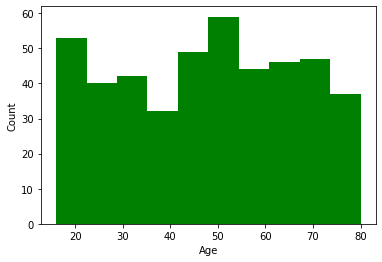

In [154]:
#Histogram 

plt.pyplot.hist(df_plasma["Age"],color="green")
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Count")

In [155]:
#Correlation 
from scipy import stats 

In [156]:
#DROPPING VARIABLE "Blood_type"
df_plasma.drop('Blood_type',axis=1)

,name,Age,Weight,Blood_A,Blood_B,Blood_O,Eligibility,Intentions,PRERT
0,mohsin ali,59,47,1,0,0,0,0,1
1,ramdin verma,79,79,1,0,0,0,1,0
2,sharat chandran,37,55,0,1,0,1,1,1
3,birender mandal,49,98,0,0,0,1,0,1
4,amit,24,81,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
444,jaipal,33,42,0,0,0,0,0,0
445,jalil ansari,18,83,0,0,1,1,0,1
446,deepak verma,69,77,0,0,0,1,1,0
447,kasim,18,78,0,0,1,1,0,1


Correlation of "Eligibility" with different variables

In [157]:
df_plasma.corr()["Eligibility"].sort_values()

Age           -0.100856
PRERT         -0.030768
Blood_A       -0.017177
Blood_O        0.009208
Intentions     0.060419
Blood_B        0.128768
Weight         0.352891
Eligibility    1.000000
Name: Eligibility, dtype: float64

# ANOVA

In [158]:
anova_age=stats.f_oneway(df_plasma['Eligibility'],df_plasma['Age'])
anova_weight=stats.f_oneway(df_plasma['Eligibility'],df_plasma['Weight'])
anova_intent=stats.f_oneway(df_plasma['Eligibility'],df_plasma['Intentions'])
anova_A=stats.f_oneway(df_plasma['Eligibility'],df_plasma['Blood_A'])
anova_B=stats.f_oneway(df_plasma['Eligibility'],df_plasma['Blood_B'])
anova_O=stats.f_oneway(df_plasma['Eligibility'],df_plasma['Blood_O'])
anova_prert=stats.f_oneway(df_plasma['Eligibility'],df_plasma['PRERT'])

In [159]:
print('anova_age:',anova_age,
      'anova_weight:',anova_weight,
      'anova_intent:',anova_intent,
      'anova_A:',anova_A,
      'anova_B:',anova_B,
      'anova_,O:',anova_O,
     'anova_prert:',anova_prert)

anova_age: F_onewayResult(statistic=2939.3572558551027, pvalue=3.734853401746918e-285) anova_weight: F_onewayResult(statistic=5481.079433861705, pvalue=0.0) anova_intent: F_onewayResult(statistic=4.3135620391151015, pvalue=0.038094174793031926) anova_A: F_onewayResult(statistic=18.26818042344277, pvalue=2.1244187887242e-05) anova_B: F_onewayResult(statistic=50.60545524394929, pvalue=2.3107232099465483e-12) anova_,O: F_onewayResult(statistic=40.56346459638949, pvalue=3.038002163233647e-10) anova_prert: F_onewayResult(statistic=2.1744519545117242, pvalue=0.14067076171411244)


OF THE ABOVE VARIABLES ONLY "INTENTION" & "PRERT" ARE STATSISTICALLY UNSIGNIFICANT BECAUSE OF LOW F-STAT VALUE AND HIGH P-VALUE,SO BOTH WILL NOT BE CONSIDER FOR THE MODEL DEVELOPMENT 


# REGRESSION 

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lm=LinearRegression() 

In [162]:
z=df_plasma[['Age','Weight','Blood_A','Blood_B','Blood_O']]
y=df_plasma['Eligibility']

In [163]:
#TRAIN THE MODEL 
lm.fit(z,y)

LinearRegression()

In [164]:
yhat=lm.predict(z)

In [165]:
#INTERCEPT AND CO-FFICIENTS 
lm.intercept_,lm.coef_

(-0.20695710430332748,
 array([-0.00208449,  0.00924283,  0.1085109 ,  0.24398864,  0.11502039]))

# Regression Plots 

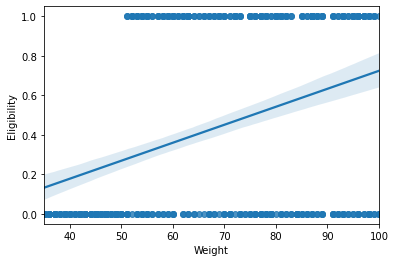

In [166]:
import seaborn as sns 
sns.regplot(x=df_plasma['Weight'],y=y,data=df_plasma)


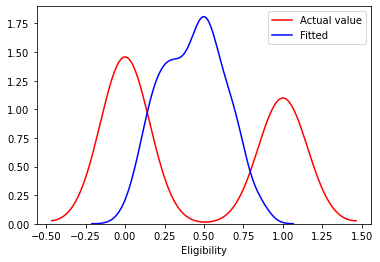

In [167]:
axl=sns.distplot(y,hist=False,color='r',label="Actual value")
sns.distplot(yhat,hist=False,ax=axl,color='b',label='Fitted')


IN ACCORDANCE WITH OUR ANLYSIS UPTIL NOW , LINERA MODEL IS NOT THE BEST FIT FOR OUR DATASET ,NEED TO TEST OTHER REGRESSION MODELS SUCH AS POLYNOMIAL , RIDGE REGRESSION ETC  AND SOME OF THE VARIABLES MIGHT NEED LOG TRANSFORMATION .